In [172]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
radius_upper = 0.7
radius_lower = 0
start = np.asarray([0, 0], dtype=np.float32)
radius = np.linspace(radius_upper, radius_lower, num=30)
angle = np.radians(np.linspace(0, 360, num=30))

In [174]:
x_vector = start[0] + radius * np.cos(angle)
y_vector = start[1] + radius * np.sin(angle)

pos = np.zeros((x_vector.shape[0],2))
pos[:, 0] += x_vector
pos[:, 1] += y_vector

In [175]:
inverted_pos = np.flipud(pos[:, ::-1])

In [176]:
x_vector2 = start[0] + radius * np.cos(np.flipud(angle))
y_vector2 = start[1] + radius * np.sin(np.flipud(angle))
inverted_pos2 = np.zeros((x_vector2.shape[0],2))
inverted_pos2[:, 0] += x_vector2
inverted_pos2[:, 1] += y_vector2
inverted_pos2 = inverted_pos2[:, ::-1]

In [177]:
inverted_pos3 = np.flipud(inverted_pos2[:, ::-1])

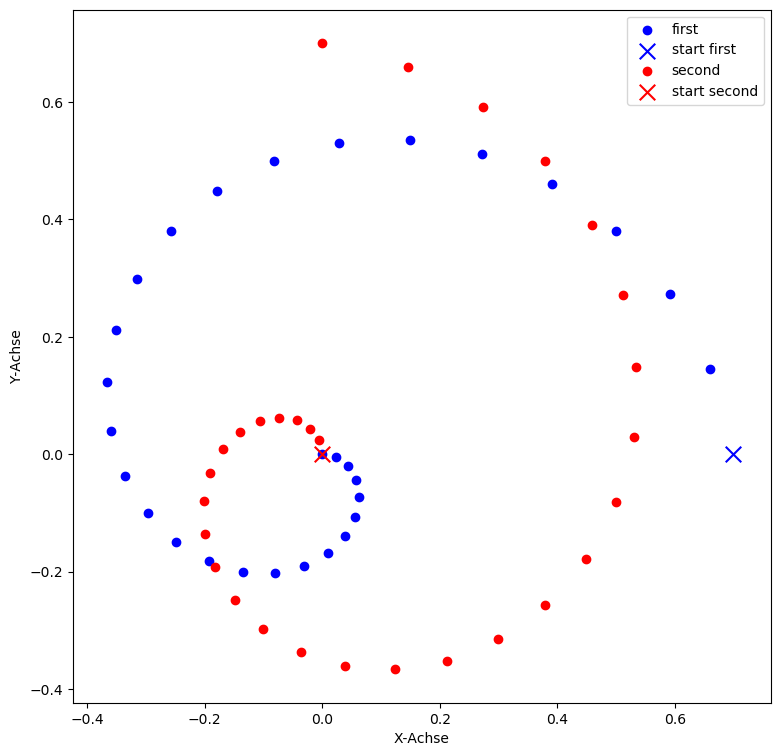

In [178]:
plt.figure(figsize=(9, 9))
plt.scatter(pos[:, 0][1:], pos[:, 1][1:], color='blue', marker='o', label='first')
plt.scatter(pos[:, 0][0], pos[:, 1][0], color='blue', marker='x', s=125, label='start first')

plt.scatter(inverted_pos[:, 0][1:], inverted_pos[:, 1][1:], color='red', marker='o', label='second')
plt.scatter(inverted_pos[:, 0][0], inverted_pos[:, 1][0], color='red', marker='x', s=125, label='start second')

plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')

plt.legend()

plt.show()

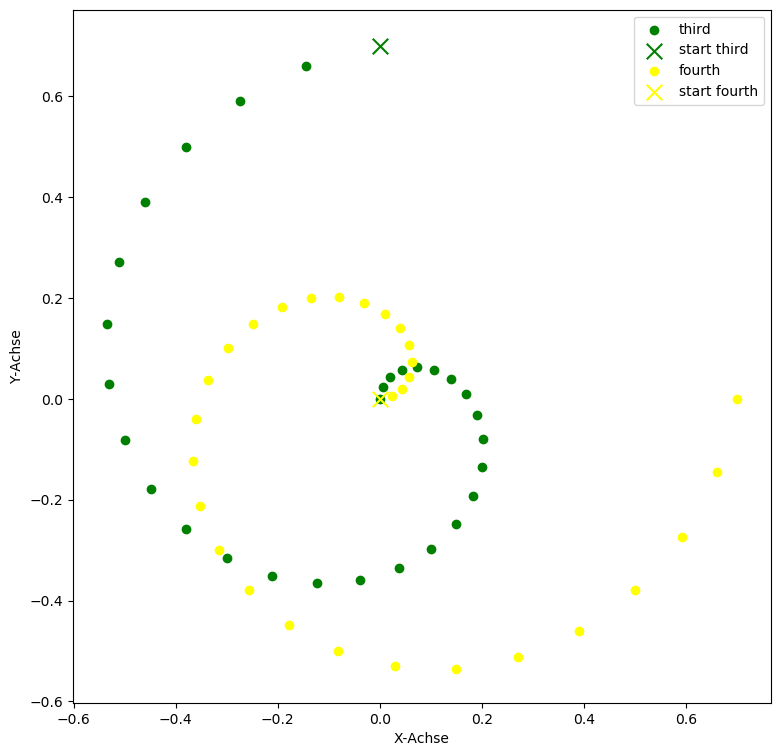

In [179]:
plt.figure(figsize=(9, 9))

plt.scatter(inverted_pos2[:, 0][1:], inverted_pos2[:, 1][1:], color='green', marker='o', label='third')
plt.scatter(inverted_pos2[:, 0][0], inverted_pos2[:, 1][0], color='green', marker='x', s=125, label='start third')

plt.scatter(inverted_pos3[:, 0][1:], inverted_pos3[:, 1][1:], color='yellow', marker='o', label='fourth')
plt.scatter(inverted_pos3[:, 0][0], inverted_pos3[:, 1][0], color='yellow', marker='x', s=125, label='start fourth')

plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')

plt.legend()

plt.show()